**Compare Classification methods on FashionMNIST Dataset**


**PART I: Apply Classification approaches on FashionMNIST Dataset**

 Prepare the Fashion MNIST dataset


In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()



In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_train_full.dtype

dtype('uint8')

In [ ]:
#creating the validation set

x_valid, x_train = x_train_full[:5000] /255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test/ 255.0


print("X_train.shape: ", x_train.shape)
print("X_valid.shape: ", x_valid.shape)
print("X_test.shape: ", x_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_valid.shape: ", y_valid.shape)
print("y_test.shape: ", y_test.shape)


X_train.shape:  (55000, 28, 28)
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (55000,)
y_valid.shape:  (5000,)
y_test.shape:  (10000,)


**Visualize the sample images in the training data**


In [ ]:
# define class name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[3]]

'Ankle boot'

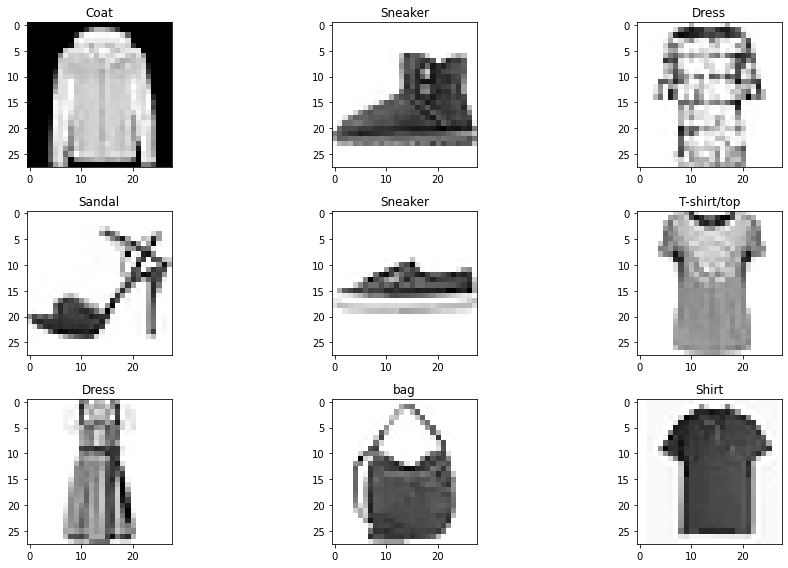

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

## first image
plt.subplot(3,3,1)
some_image = x_train[0]  #selecting one image
plt.imshow(some_image, cmap=plt.cm.gray)
plt.title('Coat')

## second image
plt.subplot(3,3,2)
some_image1 = x_train[4]
plt.imshow(some_image1, cmap=plt.cm.binary)
plt.title('Sneaker')

## third image
plt.subplot(3,3,3)
some_image2 = x_train[10]
plt.imshow(some_image2, cmap=plt.cm.binary)
plt.title('Dress')

## fourth image
plt.subplot(3,3,4)
some_image2 = x_train[67]
plt.imshow(some_image2, cmap=plt.cm.binary)
plt.title('Sandal')

## fifth image
plt.subplot(3,3,5)
some_image2 = x_train[345]
plt.imshow(some_image2, cmap=plt.cm.binary)
plt.title('Sneaker')

## xixth image
plt.subplot(3,3,6)
some_image2 = x_train[1]
plt.imshow(some_image2,cmap=plt.cm.binary)
plt.title('T-shirt/top')

plt.subplot(3,3,7)
some_image2 = x_train[344]
plt.imshow(some_image2,cmap=plt.cm.binary)
plt.title('Dress')

plt.subplot(3,3,8)
some_image2 = x_train[900]
plt.imshow(some_image2,cmap=plt.cm.binary)
plt.title('bag')

plt.subplot(3,3,9)
some_image2 = x_train[6789]
plt.imshow(some_image2,cmap=plt.cm.binary)
plt.title('Shirt')

plt.tight_layout()
plt.show()

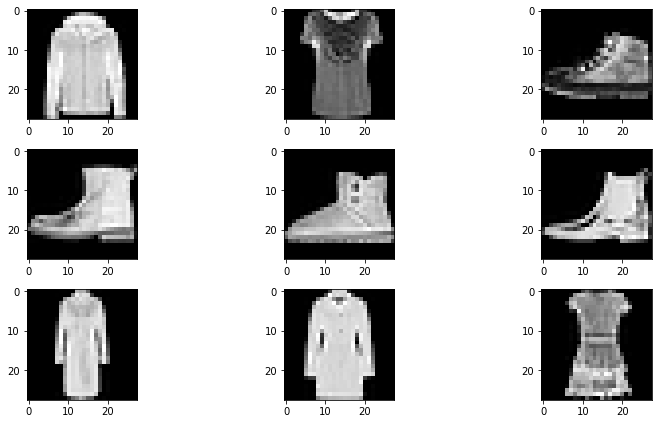

In [ ]:
#second method how to visualize the samples of training set
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for i in range(9):
  plt.subplot(331 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.tight_layout()
plt.show()

**Examine the frequency of classes in train, validation, and test set.**


In [ ]:
import pandas as pd
pd_y_train = pd.DataFrame(y_train)

0    5543
4    5512
8    5510
5    5507
6    5507
3    5499
2    5496
9    5494
7    5488
1    5444
dtype: int64


Text(0, 0.5, 'Frequency')

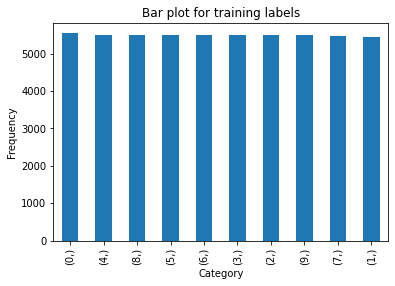

In [ ]:
import numpy as np
frequency = pd_y_train.value_counts()
category = frequency.index.tolist()
counts = frequency.values.tolist()
print(frequency)

frequency.plot(kind='bar')
plt.title('Bar plot for training labels')
plt.xlabel('Category')
plt.ylabel('Frequency')

In [ ]:
import pandas as pd
pd_y_valid = pd.DataFrame(y_valid)

1    556
7    512
9    506
2    504
3    501
5    493
6    493
8    490
4    488
0    457
dtype: int64


Text(0, 0.5, 'Frequency')

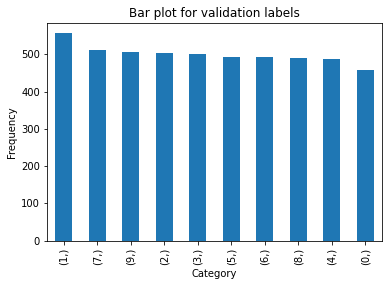

In [ ]:
import numpy as np
frequency = pd_y_valid.value_counts()
category = frequency.index.tolist()
counts = frequency.values.tolist()
print(frequency)

frequency.plot(kind='bar')
plt.title('Bar plot for validation labels')
plt.xlabel('Category')
plt.ylabel('Frequency')


0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64


Text(0, 0.5, 'Frequency')

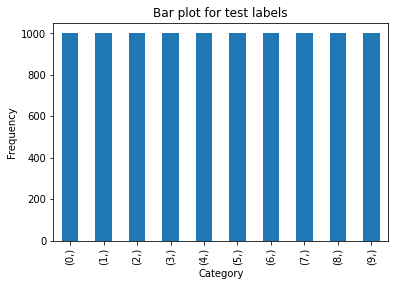

In [ ]:
pd_y_test = pd.DataFrame(y_test)

import numpy as np
frequency = pd_y_test.value_counts()
category = frequency.index.tolist()
counts = frequency.values.tolist()
print(frequency)

frequency.plot(kind='bar')
plt.title('Bar plot for test labels')
plt.xlabel('Category')
plt.ylabel('Frequency')

**Building several classification models.**

**Description of sklearn.neighbors.KNeighborsClassifier for the following four parameters about their purpose defined in this function**: 'n_neighbors', 'metric', 'p', 'n_jobs'. The description should include your understanding of how the parameters will be used in the KNN algorithm.

**n_neighbors** --> is the number of neighbors that we will tak into consideration while we train our model. Based on these neighbors, the model will predict and classify the new data sets.

**metric** --> is the method that the classifier will use in order to calculate the distance between our test point and it's neighbors. The default method is “minkowski”. p --> is power parameter for the Minkowski metric. So based on the metric that we are going to use we can choose p = 1 for manhattan_distance (l1), and p = 2 for euclidean_distance (l2).

**n_jobs** -->is an integer which specifies the maximum number of concurrently running workers.

**Description of ‘fit(X,y)’, 'predict(X)', 'predict_proba', 'score(X,y)'**.

**Answer:**

**fit(X,y)** --> it is a method for every estimator and it takes the training samples X and the labels y in order to fit the k-nearest neighbors classifier.

**predict(X)** --> as we can tell by the name, this is a method of the classifier to make a prediction when it takes the input x (training data) and the output is the prediction value which is always an array or sparse matrix.

**'predict_proba'** --> it is another method for the classifiers which return the probability estimates of each class of our test data.

**score(X,y)**  --> it is the method that it is being used to evaluate the the predictions of the classifier. It calculates the mean accuracy on the given test data and labels.If the calculated value is greater, it means that the prediction is accurate.



**Building the KNN models.**

Training the KNN model  (try any K value as you wish) on the training set (55000 images), and report the running time during the prediction process on the validation set (5000 images).

In [ ]:
img_shape = x_train.shape
n_samples = img_shape[0]
width = img_shape[1]
height = img_shape[2]

print ("n_samples: ", n_samples)
print("width: ", width)
print("height: ", height)

x_train_flatten = x_train.reshape(n_samples, width*height)
print("x_train_flatten_shape: ", x_train_flatten.shape)

n_samples:  55000
width:  28
height:  28
x_train_flatten_shape:  (55000, 784)


In [ ]:
img_shape1 = x_test.shape
n_samples_test = img_shape1[0]
width = img_shape1[1]
height = img_shape1[2]

print ("n_samples: ", n_samples_test)
print("width: ", width)
print("height: ", height)

x_test_flatten = x_test.reshape(n_samples_test, width*height)
print("x_test_flatten_shape: ", x_test_flatten.shape)

n_samples:  10000
width:  28
height:  28
x_test_flatten_shape:  (10000, 784)


In [ ]:
img_shape2 = x_valid.shape
n_samples_test = img_shape2[0]
width = img_shape2[1]
height = img_shape2[2]

print ("n_samples: ", n_samples_test)
print("width: ", width)
print("height: ", height)

x_valid_flatten = x_valid.reshape(n_samples_test, width*height)
print("x_valid_flatten_shape: ", x_valid_flatten.shape)

n_samples:  5000
width:  28
height:  28
x_valid_flatten_shape:  (5000, 784)


In [ ]:
#trying to scale the features by using the StandardScaler


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

standardscaler = StandardScaler()
x_train_scale = standardscaler.fit_transform(x_train_flatten)
#x_train.shape

KNN_classifier_scale = KNeighborsClassifier(n_neighbors=3)
KNN_classifier_scale.fit(x_train_scale, y_train)

x_test_stand = standardscaler.transform(x_test_flatten)


In [ ]:
#k=5
KNN_classifier_scale = KNeighborsClassifier(n_neighbors=5)
KNN_classifier_scale.fit(x_train_scale, y_train)
x_test_stand = standardscaler.transform(x_test_flatten)


**Applying the cross-validation method  to evaluate a model.**

Using sklearn, we can call its method 'cross_val_score()' to evaluate one machine learning model on the training dataset.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')
CV_scores = cross_val_score(estimator = KNN_classifier, X = x_train_flatten, y = y_train, cv = 3, scoring = 'accuracy')
print("CV_scores: ", CV_scores)

CV_scores:  [0.84749645 0.85070638 0.84776087]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
CV_scores = cross_val_score(estimator = KNN_classifier, X = x_train_flatten, y = y_train, cv = 3, scoring = 'accuracy')
print("CV_scores: ", CV_scores)

CV_scores:  [0.8488055  0.84994273 0.84841543]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
CV_scores = cross_val_score(estimator = KNN_classifier, X = x_train_flatten, y = y_train, cv = 3, scoring = 'accuracy')
print("CV_scores: ", CV_scores)

CV_scores:  [0.84466019 0.84748814 0.84503355]


**Finetune the model**

in case of KNN, we have different choices of n_neighbors and metrics, we need apply Cross-Validation on each of parameter combinations, and select the best model among them.
We can use Scikit-Learn's Gridsearch to select the best model for the data.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier()

n_neighbors_list = [ 3, 5, 7]
from scipy.spatial import distance
metrics_list = [distance.euclidean, distance.minkowski, distance.cosine]

KNN_param_grid = {
'n_neighbors': n_neighbors_list,
'metric': metrics_list
}

# define grid_search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_param_grid, cv = 3, scoring = 'accuracy', return_train_score = True)

In [ ]:
grid_search.fit(x_train_flatten, y = y_train)




In [ ]:
#Train first classification model

import time
start = time.time()

from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_classifier.fit(x_train_flatten, y_train)
y_valid_predicted_label = KNN_classifier.predict(x_valid_flatten)

y_valid_predicted_label

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))




Program finishes in 18.512868642807007 seconds:


**Practice how to save the trained model to disk.**

 Write codes to re-load the model to answer the remaining questions.

In [ ]:
from joblib import dump, load
dump(KNN_classifier, 'fashionMNIST.joblib')

['fashionMNIST.joblib']

In [ ]:
import pandas as pd
prediction_summary = pd.DataFrame({'predicted_label':y_valid_predicted_label, 'actual_label':y_valid})
prediction_summary

,predicted_label,actual_label
0,9,9
1,0,0
2,0,0
3,6,3
4,0,0
...,...,...
4995,7,7
4996,6,6
4997,5,5
4998,8,8


**Calculate the overall accuracy of the validation predictions.**

In [ ]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_valid, y_valid_predicted_label))

Accuracy:  0.8614


**Calculate the per-class accuracy of the predictions.**

For instance, among images of T-shirt, we need to calculate how many of T-shirt images are correctly predicted.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_valid, y_valid_predicted_label)
conf_matrix


array([[404,   2,   5,  10,   1,   0,  33,   0,   2,   0],
       [  4, 538,   3,   7,   0,   0,   4,   0,   0,   0],
       [  6,   0, 410,   4,  50,   0,  31,   1,   1,   1],
       [ 16,   3,   6, 443,  17,   0,  16,   0,   0,   0],
       [  2,   0,  62,  14, 372,   0,  38,   0,   0,   0],
       [  0,   0,   0,   0,   0, 417,   1,  52,   3,  20],
       [102,   1,  71,   7,  38,   0, 268,   0,   5,   1],
       [  0,   0,   0,   0,   0,   0,   0, 490,   0,  22],
       [  2,   0,   3,   6,   1,   1,   4,   2, 470,   1],
       [  0,   0,   0,   0,   0,   0,   0,  11,   0, 495]])

In [ ]:
Matrix_sum =[]
for i in range(len(conf_matrix)):
    x = sum(conf_matrix[i])
    Matrix_sum.append(x)

print(Matrix_sum)

[457, 556, 504, 501, 488, 493, 493, 512, 490, 506]


In [ ]:
diagonal = conf_matrix.diagonal()
diagonal

array([404, 538, 410, 443, 372, 417, 268, 490, 470, 495])

In [ ]:
Accuracy_per_class = ([i / j for i, j in zip(diagonal, Matrix_sum)])

Accuracy_per_class

for i in range(10):
  print("Validation accuracy of", i, " class is:", Accuracy_per_class[i])

Validation accuracy of 0  class is: 0.8840262582056893
Validation accuracy of 1  class is: 0.9676258992805755
Validation accuracy of 2  class is: 0.8134920634920635
Validation accuracy of 3  class is: 0.8842315369261478
Validation accuracy of 4  class is: 0.7622950819672131
Validation accuracy of 5  class is: 0.845841784989858
Validation accuracy of 6  class is: 0.5436105476673428
Validation accuracy of 7  class is: 0.95703125
Validation accuracy of 8  class is: 0.9591836734693877
Validation accuracy of 9  class is: 0.9782608695652174


**Let's visualize the classification confusion matrix to check the details of the validation predictions for each class.**




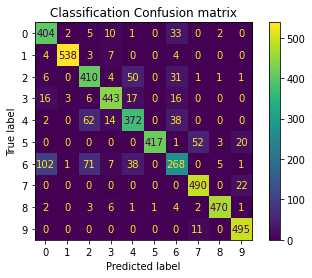

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

**Try different K values, and select the best model that has highest validation accuracy.**

Make the predictions on test set (10000 images). And visualize the classification confusion matrix on the test set to report the details of predictions over every class (as Figure in Task 4.1.8).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')
CV_scores = cross_val_score(estimator = KNN_classifier, X = x_train_flatten, y = y_train, cv = 3, scoring = 'accuracy')
print("CV_scores: ", CV_scores)



CV_scores:  [0.84749645 0.85070638 0.84776087]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_classifier.fit(x_train_flatten, y_train)
y_valid_predicted_label = KNN_classifier.predict(x_valid_flatten)

y_valid_predicted_label
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_valid, y_valid_predicted_label))

Accuracy:  0.8614


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
KNN_classifier.fit(x_train_flatten, y_train)
y_valid_predicted_label = KNN_classifier.predict(x_valid_flatten)

y_valid_predicted_label
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_valid, y_valid_predicted_label))

Accuracy:  0.861


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')
KNN_classifier.fit(x_train_flatten, y_train)
y_valid_predicted_label = KNN_classifier.predict(x_valid_flatten)

y_valid_predicted_label
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_valid, y_valid_predicted_label))

Accuracy:  0.8582


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
KNN_classifier.fit(x_train_flatten, y_train)
y_valid_predicted_label = KNN_classifier.predict(x_valid_flatten)

y_valid_predicted_label
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_valid, y_valid_predicted_label))

Accuracy:  0.8594


In [ ]:
#based on the higher accuracy we will choose the model with 5 neighbors to make predictions for the test set

y_test_predicted = KNN_classifier.predict(x_test_flatten)

In [ ]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_test_predicted))

Accuracy:  0.8504


In [ ]:
len(y_test)

10000

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_predicted)
conf_matrix

array([[857,   0,  16,  19,   5,   0,  93,   1,   9,   0],
       [  8, 963,   6,  13,   4,   0,   5,   0,   1,   0],
       [ 22,   1, 813,  10,  75,   0,  79,   0,   0,   0],
       [ 34,   4,  15, 871,  34,   0,  40,   0,   2,   0],
       [  1,   0, 126,  25, 749,   0,  98,   0,   1,   0],
       [  1,   0,   0,   1,   0, 790,   5, 117,   2,  84],
       [186,   0, 129,  22,  69,   0, 581,   0,  13,   0],
       [  0,   0,   0,   0,   0,   2,   0, 961,   0,  37],
       [  0,   1,  14,   4,   8,   0,  15,   6, 950,   2],
       [  0,   0,   0,   0,   0,   1,   1,  29,   0, 969]])

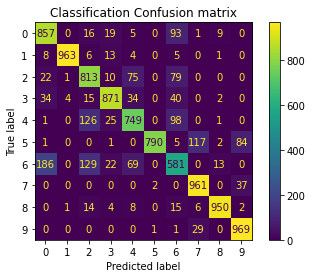

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted)
plt.title("Classification Confusion matrix")
plt.show()

**Calculate the overall accuracy of the predictions over validation set and test set using the best model**


In [ ]:
from sklearn import metrics
print("Accuracy in the test set: ", metrics.accuracy_score(y_test, y_test_predicted))

Accuracy in the test set:  0.8504


In [ ]:
from sklearn import metrics
print("Accuracy in the validation set: ", metrics.accuracy_score(y_valid, y_valid_predicted_label))

Accuracy in the validation set:  0.8594


**Training the model on the training set (55000 images), and report the running time during the prediction process on the validation set (5000 images).**

Compare the running time with the prediction process of KNN In Task 4.1, which method's prediction is faster?

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_full[:5000] /255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test/ 255.0

#reshape the train dataset
img_shape = x_train.shape
n_samples = img_shape[0]
width = img_shape[1]
height = img_shape[2]

print ("n_samples: ", n_samples)
print("width: ", width)
print("height: ", height)

x_train_flatten = x_train.reshape(n_samples, width*height)
print("x_train_flatten_shape: ", x_train_flatten.shape)

#reshape the test dataset
img_shape1 = x_test.shape
n_samples_test = img_shape1[0]
width = img_shape1[1]
height = img_shape1[2]

print ("n_samples: ", n_samples_test)
print("width: ", width)
print("height: ", height)

x_test_flatten = x_test.reshape(n_samples_test, width*height)
print("x_test_flatten_shape: ", x_test_flatten.shape)


#reshape the validation dataset
img_shape2 = x_valid.shape
n_samples_test = img_shape2[0]
width = img_shape2[1]
height = img_shape2[2]

print ("n_samples: ", n_samples_test)
print("width: ", width)
print("height: ", height)

x_valid_flatten = x_valid.reshape(n_samples_test, width*height)
print("x_valid_flatten_shape: ", x_valid_flatten.shape)


4431872/4422102 [==============================] - 0s 0us/step
n_samples:  55000
width:  28
height:  28
x_train_flatten_shape:  (55000, 784)
n_samples:  10000
width:  28
height:  28
x_test_flatten_shape:  (10000, 784)
n_samples:  5000
width:  28
height:  28
x_valid_flatten_shape:  (5000, 784)


In [ ]:
import time
start = time.time()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_classifier = LinearDiscriminantAnalysis()
LDA_classifier.fit(x_train_flatten, y_train)

y_valid_pred_label = LDA_classifier.predict(x_valid_flatten)
y_valid_pred_label

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

#the running time for LDA model (15 sec) is smaller compared to the KNN classifier (18 sec)

Program finishes in 15.841856956481934 seconds:


**Save the trained model to disk.**

In [ ]:
from joblib import dump, load
dump(LDA_classifier, 'fashionMNIST_LDA.joblib')

['fashionMNIST_LDA.joblib']

**Calculate the overall accuracy of the predictions over training set, validation set and test set.**



In [ ]:
from sklearn import metrics
print("Accuracy in the validation set: ", metrics.accuracy_score(y_valid, y_valid_pred_label))

Accuracy in the validation set:  0.8312


In [ ]:
y_test_pred_label = LDA_classifier.predict(x_test_flatten)
y_test_pred_label

from sklearn import metrics
print("Accuracy in the test set: ", metrics.accuracy_score(y_test, y_test_pred_label))

Accuracy in the test set:  0.8141


**Calculate the per-class accuracy of the predictions over the test set. For instance, among images of T-shirt, we need to calculate how many of T-shirt images are correctly predicted.**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_LDA = confusion_matrix(y_test, y_test_pred_label)
conf_matrix_LDA

array([[781,   0,  14,  62,   8,   3, 123,   0,   9,   0],
       [  5, 932,   9,  44,   4,   0,   4,   0,   2,   0],
       [ 26,   0, 679,   9, 166,   0, 110,   0,  10,   0],
       [ 23,   1,  16, 847,  31,   2,  78,   0,   2,   0],
       [  0,   2, 107,  30, 741,   0, 115,   0,   5,   0],
       [  0,   0,   1,   1,   0, 887,   0,  61,  11,  39],
       [137,   0, 132,  47, 103,   2, 557,   0,  22,   0],
       [  0,   0,   0,   0,   0,  55,   0, 891,   1,  53],
       [  1,   0,   5,  13,   3,  14,  39,   5, 919,   1],
       [  0,   0,   0,   1,   0,  40,   2,  50,   0, 907]])

In [ ]:
Matrix_sum_LDA =[]
for i in range(len(conf_matrix_LDA)):
    x = sum(conf_matrix_LDA[i])
    Matrix_sum_LDA.append(x)

print(Matrix_sum_LDA)

diagonal_LDA = conf_matrix_LDA.diagonal()
diagonal_LDA

Accuracy_per_class_LDA = ([i / j for i, j in zip(diagonal_LDA, Matrix_sum_LDA)])

Accuracy_per_class_LDA

for i in range(10):
  print("Validation accuracy of", i, " class is:", Accuracy_per_class_LDA[i])

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
Validation accuracy of 0  class is: 0.781
Validation accuracy of 1  class is: 0.932
Validation accuracy of 2  class is: 0.679
Validation accuracy of 3  class is: 0.847
Validation accuracy of 4  class is: 0.741
Validation accuracy of 5  class is: 0.887
Validation accuracy of 6  class is: 0.557
Validation accuracy of 7  class is: 0.891
Validation accuracy of 8  class is: 0.919
Validation accuracy of 9  class is: 0.907


**Deploy the machine learning models on Gradio or huggingface**

In [ ]:
import gradio as gr

input_image = gr.inputs.Image(shape=(28, 28))
input_model = gr.inputs.Dropdown(['KNN_classifier', 'LDA_classifier', 'Quadratic discriminant analysis', 'Naive Bayes classifier'])

def fashion_MNIST_prediction (image, model):



output_label = gr.outputs.Textbox(label="Predicted Label")
output_probability = gr.outputs.Label(num_top_classes=10, label="Predicted Probability Per Class")